# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

#import sleep
from time import sleep
#import datetime
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        # append city object that contains city_name and county_code so we  can access both later
        cities.append(city) 

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query = f"{url}appid={api_key}&units={units}&q="

In [93]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []
city_names = []
country_codes = []

for index, city in enumerate(cities):
    #take out city_name and county_code for shorter lines
    cname = city.city_name
    ccode = city.country_code.upper()
    
    response = requests.get(f"{query}{cname},{ccode}").json()
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        city_names.append(cname)
        country_codes.append(ccode)
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])

    except KeyError:
        print(KeyError)
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # When clouds does not exist, set to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing Data Retrieval  {index + 1} | {cname}") #enumerate starts at zero, this is to align with previous count.
    print(f"{query}{cname},{ccode}")
    sleep(1.2)

print("--------------------------------------------")
print("End Data Retrieval ")
print("--------------------------------------------")

Processing Data Retrieval  1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=rikitea,PF
Processing Data Retrieval  2 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=ostrovnoy,RU
Processing Data Retrieval  3 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=puerto ayora,EC
Processing Data Retrieval  4 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=kruisfontein,ZA
Processing Data Retrieval  5 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=bluff,NZ
Processing Data Retrieval  6 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=fairbanks,US
Processing Data Retrieval  7 | yulara
http://api.openweath

Processing Data Retrieval  53 | yuanping
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=yuanping,CN
Processing Data Retrieval  54 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=georgetown,SH
Processing Data Retrieval  55 | brzesko
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=brzesko,PL
Processing Data Retrieval  56 | broome
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=broome,AU
Processing Data Retrieval  57 | sibenik
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=sibenik,HR
Processing Data Retrieval  58 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=khatanga,RU
<class 'KeyError'>
Processing Data Retrieval  59 | asfi
http://api.o

Processing Data Retrieval  105 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=husavik,IS
Processing Data Retrieval  106 | novovasylivka
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=novovasylivka,UA
Processing Data Retrieval  107 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=leningradskiy,RU
Processing Data Retrieval  108 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=nikolskoye,RU
Processing Data Retrieval  109 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=hermanus,ZA
Processing Data Retrieval  110 | nador
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=nador,MA
<class 'KeyError'>
Processing Data Retriev

Processing Data Retrieval  157 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=komsomolskiy,RU
Processing Data Retrieval  158 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=klaksvik,FO
<class 'KeyError'>
Processing Data Retrieval  159 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=sentyabrskiy,RU
Processing Data Retrieval  160 | rorvik
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=rorvik,NO
Processing Data Retrieval  161 | luba
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=luba,GQ
Processing Data Retrieval  162 | manaure
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=manaure,CO
Processing Data Retrieval  163 | corp

Processing Data Retrieval  209 | cabadiangan
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=cabadiangan,PH
<class 'KeyError'>
Processing Data Retrieval  210 | burica
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=burica,PA
Processing Data Retrieval  211 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=nanortalik,GL
Processing Data Retrieval  212 | port blair
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=port blair,IN
Processing Data Retrieval  213 | northam
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=northam,AU
Processing Data Retrieval  214 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=san cristobal,EC
Processing Data Retri

Processing Data Retrieval  261 | sur
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=sur,OM
Processing Data Retrieval  262 | boshnyakovo
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=boshnyakovo,RU
Processing Data Retrieval  263 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=bubaque,GW
Processing Data Retrieval  264 | gandajika
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=gandajika,CD
Processing Data Retrieval  265 | baker city
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=baker city,US
Processing Data Retrieval  266 | bria
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=bria,CF
<class 'KeyError'>
Processing Data Retrieval  267 | paucartambo
ht

Processing Data Retrieval  314 | buraydah
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=buraydah,SA
Processing Data Retrieval  315 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=narsaq,GL
Processing Data Retrieval  316 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=tilichiki,RU
Processing Data Retrieval  317 | gimli
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=gimli,CA
Processing Data Retrieval  318 | alexandria
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=alexandria,EG
Processing Data Retrieval  319 | kapit
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=kapit,MY
Processing Data Retrieval  320 | puerto rondon
http://api.openweathe

Processing Data Retrieval  366 | dauriya
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=dauriya,RU
Processing Data Retrieval  367 | manono
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=manono,CD
Processing Data Retrieval  368 | sibu
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=sibu,MY
<class 'KeyError'>
Processing Data Retrieval  369 | gat
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=gat,LY
<class 'KeyError'>
Processing Data Retrieval  370 | codrington
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=codrington,AG
Processing Data Retrieval  371 | penzance
http://api.openweathermap.org/data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=penzance,GB
<class 'KeyError'>
Processing Data Retri

ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?appid=596746529ea4f9d4f1936ae2d2012463&units=imperial&q=gulbene,LV (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001CBF0ADC0B8>: Failed to establish a new connection: [WinError 10065] A socket operation was attempted to an unreachable host',))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [94]:
print(len(city_names))
print(len(cloudiness))
print(len(country_codes))
print(len(dates))
print(len(humidity))
print(len(latitude))
print(len(longitude))
print(len(temperature))
print(len(wind_speed))

weather_df = pd.DataFrame({"City": city_names,
                           "Cloudiness": cloudiness,
                           "Country": country_codes,
                           "Date": dates,
                           "Humidity": humidity,
                           "Lat": latitude,
                           "Lng": longitude,
                           "Max Temp": temperature,
                           "Wind Speed": wind_speed})

# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

#print(f"The data frame contains {len(weather_df['City'])} unique cities.")
weather_df.head()

385
385
385
385
385
385
385
385
385


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,67,PF,1.578174e+09,77.0,-23.12,-134.97,77.20,16.60
1,ostrovnoy,100,RU,1.578174e+09,86.0,68.05,39.51,24.31,25.72
2,puerto ayora,75,EC,1.578174e+09,65.0,-0.74,-90.35,82.40,20.80
3,kruisfontein,49,ZA,1.578174e+09,96.0,-34.00,24.73,68.18,3.51
4,bluff,100,NZ,1.578174e+09,81.0,-46.60,168.33,55.99,21.00


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

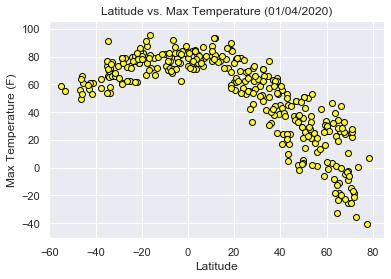

In [109]:
sns.set()

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Lat'], y = weather_df['Max Temp'],edgecolors = 'black', color = 'yellow')

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-60,85)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)


plt.show()

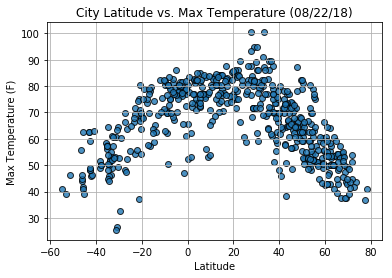

#### Latitude vs. Humidity Plot

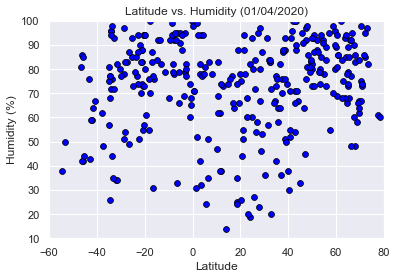

In [101]:
# Set the aesthetic using Seaborn
sns.set()

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Lat'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-60,80)
plt.ylim(10, 100)


plt.show()

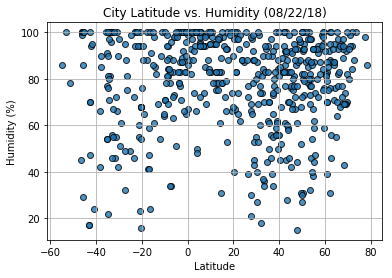

#### Latitude vs. Cloudiness Plot

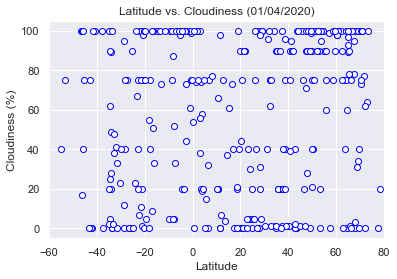

In [110]:
sns.set()

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Lat'], y = weather_df['Cloudiness'],
            linewidths = 1, edgecolors = 'blue', color = 'white')

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-60,80)
plt.ylim(-5, 105)


plt.show()

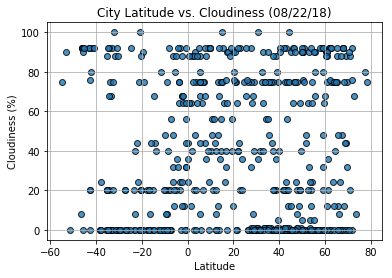

#### Latitude vs. Wind Speed Plot

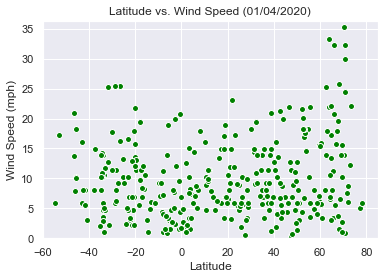

In [114]:
sns.set()

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Lat'], y = weather_df['Wind Speed'], edgecolors = 'white', color = 'green')

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-60,85)
plt.ylim(0, max(weather_df['Wind Speed'])+1)


plt.show()

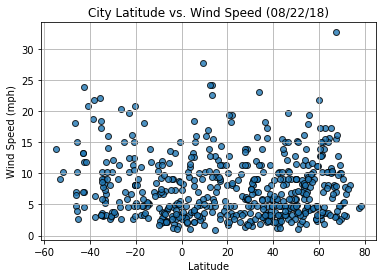

# Analytical report

1, Not a surprise, there is strong coorelation bt Latitude and temperature: higher the latitude, lower the temperature. When it comes to Humdity and Wind Speed, it doesnt seems so strong- various latitude with various humdity and wind speed. The instersteing finding is cloudiness, 0 or 90 are the 2 most typical data: no cloud or overly cloudy.

2, The insteresting find about cities is: no cities beyond -60 latitdue( South equator). On the North equator, there are not lack of cities been reported;

3, THe limitation of the report is altitude should be taking into consideration when it comes to such study which would make the result more valuable. 
